<a href="https://colab.research.google.com/github/Zoomma1/VUT_Machine_Learning_Fundamentals_Victor_Germain/blob/main/Lab01_SVM/MPA_MLF_SVM_2students_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:


In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1

Split data into training and testing parts:

In [3]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [4]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [5]:
selected_data = X[:,0:2]
mask = (y != 2)
X2 = selected_data[mask]
y2 = y[mask]

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

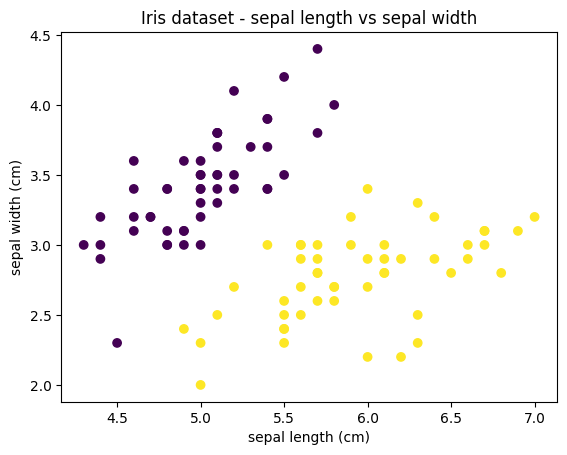

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X2[:,0],X2[:,1],c=y2)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Iris dataset - sepal length vs sepal width')
plt.show()


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [7]:
X_tr, X_te, y_tr, y_te = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

def classifier_regulation(C):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_tr, y_tr)
    return clf

for C in (1.0, 50.0, 100.0, 150.0, 200.0):
    clf = classifier_regulation(C)
    acc = clf.score(X_te, y_te)
    print(f"C={C}: test accuracy={acc:.3f}, support vectors per class={clf.n_support_}")

C=1.0: test accuracy=1.000, support vectors per class=[7 7]
C=50.0: test accuracy=1.000, support vectors per class=[2 1]
C=100.0: test accuracy=1.000, support vectors per class=[2 1]
C=150.0: test accuracy=1.000, support vectors per class=[2 1]
C=200.0: test accuracy=1.000, support vectors per class=[2 1]


C=1.0: test accuracy=1.000, support vectors per class=[7 7]

C=50.0: test accuracy=1.000, support vectors per class=[2 1]

C=100.0: test accuracy=1.000, support vectors per class=[2 1]

C=150.0: test accuracy=1.000, support vectors per class=[2 1]

C=200.0: test accuracy=1.000, support vectors per class=[2 1]

In [8]:
support_vectors = clf.n_support_
print(f"Support vectors per class: {support_vectors}")

Support vectors per class: [2 1]


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

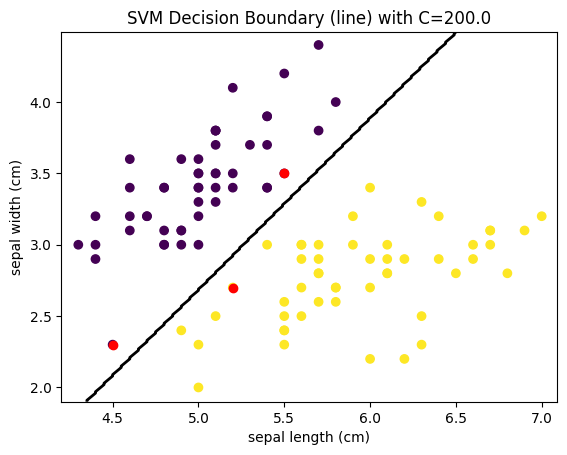

In [20]:
import numpy as np

clf = classifier_regulation(200.0)

def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    support_vector = clf.support_vectors_
    Z = clf.predict(grid_points)
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')
    plt.scatter(support_vector[:, 0], support_vector[:, 1], color = "red")
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title('SVM Decision Boundary (line) with C={}'.format(clf.C))
    plt.show()

plot_decision_boundary(clf, X2, y2)

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

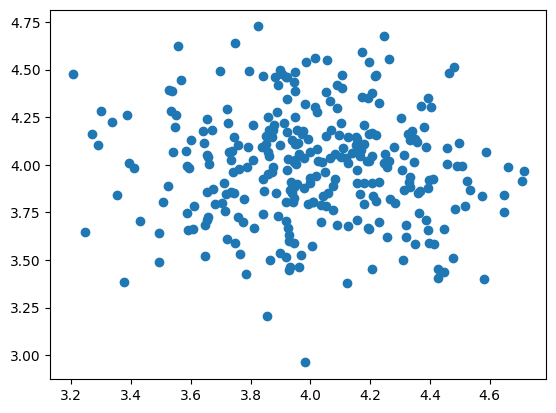

In [10]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

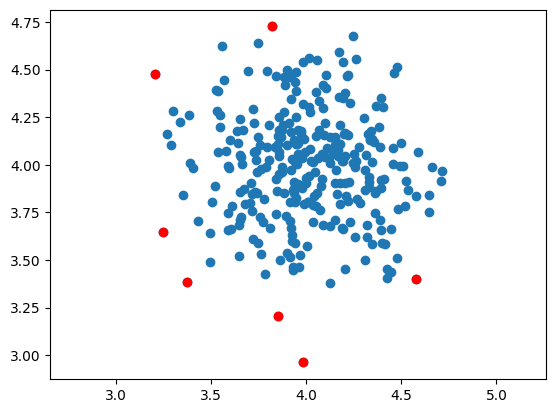

In [11]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

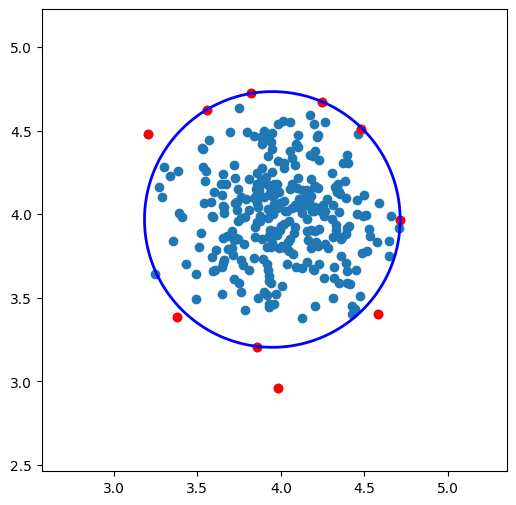

In [26]:
oc_clf = SVMmodelOne

x_min, x_max = x[:,0].min() - 0.5, x[:,0].max() + 0.5
y_min, y_max = x[:,1].min() - 0.5, x[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = oc_clf.decision_function(grid).reshape(xx.shape)
support_vectors = oc_clf.support_vectors_

plt.figure(figsize=(6,6))
plt.contour(xx, yy, Z, levels=[0], colors='blue', linewidths=2)
plt.scatter(x[:,0], x[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.axis('equal')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

5% quantile threshold = 8.989098620408397


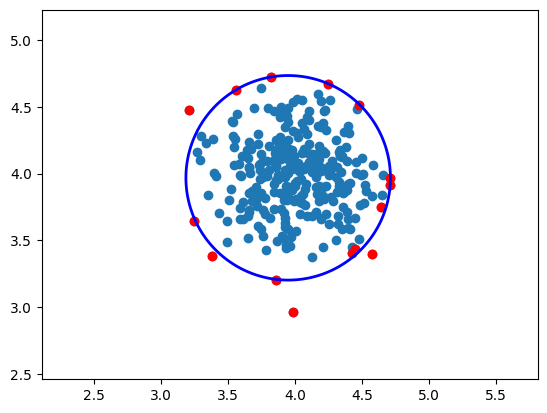

In [27]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.05)
print(f"5% quantile threshold = {thresh}")
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.contour(xx, yy, Z, levels=[0], colors='blue', linewidths=2)
plt.axis('equal')
plt.show()